<a href="https://colab.research.google.com/github/pjab/first-website/blob/dev/CabIII.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Modules

In [ ]:
# import & alias modules
import math 
import pandas as pd
from scipy import stats
import seaborn as sns 
import matplotlib.pyplot as plt
sns.set()

## Bringing in the Dataset

In [ ]:
#read in data
athletes = pd.read_csv("https://raw.githubusercontent.com/Thinkful-Ed/data-analytics-lectures/master/week-12/athletes.csv")

athletes.info() # see the information for our dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rcc     202 non-null    float64
 1   wcc     202 non-null    float64
 2   hc      202 non-null    float64
 3   hg      202 non-null    float64
 4   ferr    202 non-null    int64  
 5   bmi     202 non-null    float64
 6   ssf     202 non-null    float64
 7   pcBfat  202 non-null    float64
 8   lbm     202 non-null    float64
 9   ht      202 non-null    float64
 10  wt      202 non-null    float64
 11  sex     202 non-null    object 
 12  sport   202 non-null    object 
dtypes: float64(10), int64(1), object(2)
memory usage: 20.6+ KB


*If you had missing values -- atheles.dropna() / athletes.fillna("missing")*

In [ ]:
athletes.head() # see the first 5 rows

,rcc,wcc,hc,hg,ferr,bmi,ssf,pcBfat,lbm,ht,wt,sex,sport
0,3.96,7.5,37.5,12.3,60,20.56,109.1,19.75,63.32,195.9,78.9,f,B_Ball
1,4.41,8.3,38.2,12.7,68,20.67,102.8,21.30,58.55,189.7,74.4,f,B_Ball
2,4.14,5.0,36.4,11.6,21,21.86,104.6,19.88,55.36,177.8,69.1,f,B_Ball
3,4.11,5.3,37.3,12.6,69,21.88,126.4,23.66,57.18,185.0,74.9,f,B_Ball
4,4.45,6.8,41.5,14.0,29,18.96,80.3,17.64,53.20,184.6,64.6,f,B_Ball


In [ ]:
athletes.describe() # see the descriptive statistics

,rcc,wcc,hc,hg,ferr,bmi,ssf,pcBfat,lbm,ht,wt
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,4.718614,7.108911,43.091584,14.566337,76.876238,22.955891,69.021782,13.507426,64.873713,180.103960,75.007921
std,0.457976,1.800337,3.662989,1.362451,47.501239,2.863933,32.565333,6.189826,13.070197,9.734494,13.925199
min,3.800000,3.300000,35.900000,11.600000,8.000000,16.750000,28.000000,5.630000,34.360000,148.900000,37.800000
25%,4.372500,5.900000,40.600000,13.500000,41.250000,21.082500,43.850000,8.545000,54.667500,174.000000,66.525000
50%,4.755000,6.850000,43.500000,14.700000,65.500000,22.720000,58.600000,11.650000,63.035000,179.700000,74.400000
75%,5.030000,8.275000,45.575000,15.575000,97.000000,24.465000,90.350000,18.080000,74.750000,186.175000,84.125000
max,6.720000,14.300000,59.700000,19.200000,234.000000,34.420000,200.800000,35.520000,106.000000,209.400000,123.200000


## Explore the Dataset

In [ ]:
# Find number of records for each sport (t test)
athletes['sport'].value_counts()

Row        37
T_400m     29
B_Ball     25
Netball    23
Swim       22
Field      19
W_Polo     17
T_Sprnt    15
Tennis     11
Gym         4
Name: sport, dtype: int64

In [ ]:
# Create a crosstab of record count for sport and sex (t test)
pd.crosstab(athletes['sport'], athletes['sex'])

sex,f,m
sport,,
B_Ball,13,12
Field,7,12
Gym,4,0
Netball,23,0
Row,22,15
Swim,9,13
T_400m,11,18
T_Sprnt,4,11
Tennis,7,4


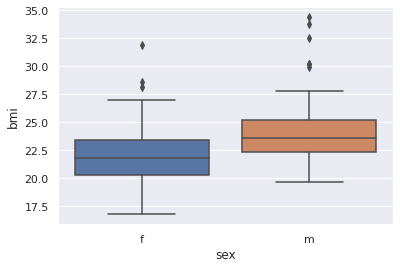

In [ ]:
# Make a boxplot to visualize our difference
sns.boxplot(y = athletes['bmi'], x = athletes['sex'])

*So it appears in the sample, males have a high BMI--we will test for statistical signnificance in the population with a t-test.*

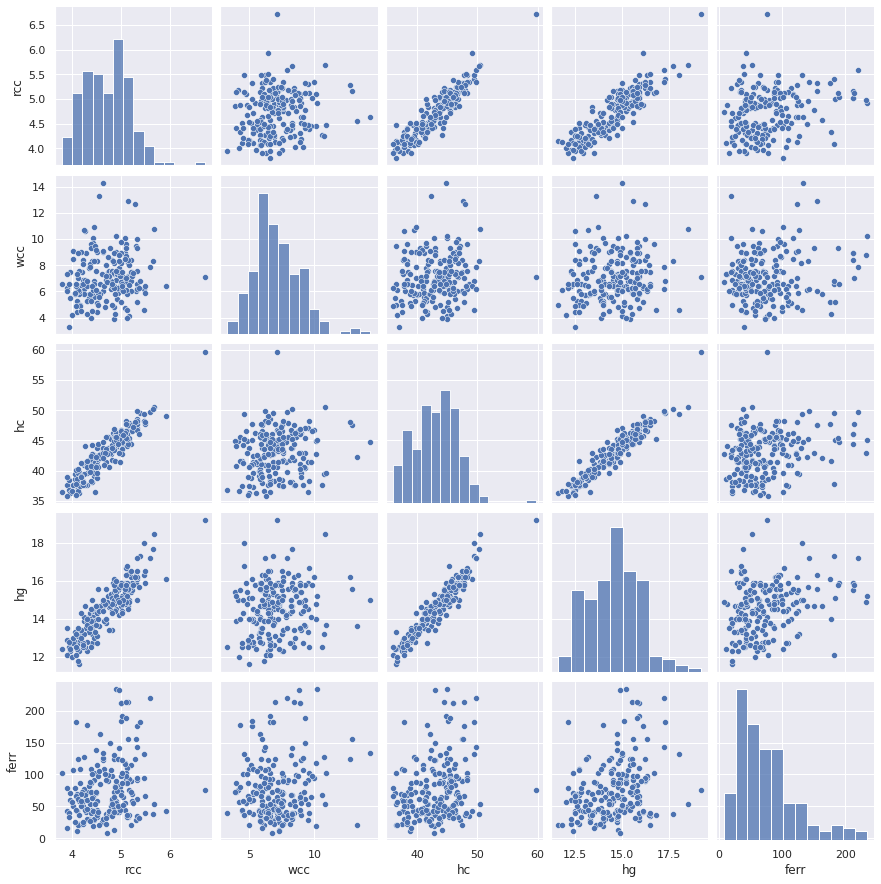

In [ ]:
# Make a pairplot of the athlete DataFrame’s red cell count (rcc), 
# white cell count (wcc), Hematocrit (hc), Hemoglobin (hg), and ferritin (ferr) (pearson r//correlation in general)
sns.pairplot(athletes, vars = ["rcc", "wcc", "hc", "hg", "ferr"]) 

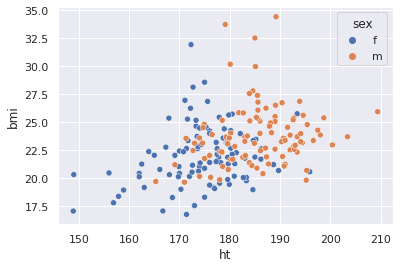

In [ ]:
# Make a scatterplot of height and bmi,
# with sex represented by color
sns.scatterplot(x='ht', y='bmi', hue='sex', data=athletes)

## Analyze the Dataset

In [ ]:
# Test for correlation
stats.pearsonr(athletes['ht'],athletes['bmi'])

(0.33709720220355527, 9.311122616028093e-07)

***There is***/*There is not* a statistically significant linear relationship between height and bmi. The relationship is ***positive***/*negative*.

In [ ]:
# Split the data for a t-test
athletes_m = athletes.loc[athletes['sex'] == 'm']
athletes_f = athletes.loc[athletes['sex'] == 'f']

In [ ]:
athletes_m.head()
#athletes_f.head()     # (sanity check)

,rcc,wcc,hc,hg,ferr,bmi,ssf,pcBfat,lbm,ht,wt,sex,sport
100,5.13,7.1,46.8,15.9,34,22.46,44.5,8.47,61.0,172.7,67.0,m,Swim
101,4.83,7.6,45.2,15.2,97,23.88,41.8,7.68,69.0,176.5,74.4,m,Swim
102,5.09,4.7,46.6,15.9,55,23.68,33.7,6.16,74.0,183.0,79.3,m,Swim
103,5.17,4.1,44.9,15.0,76,23.15,50.9,8.56,80.0,194.4,87.5,m,Swim
104,5.11,6.7,46.1,15.6,93,22.32,40.5,6.86,78.0,193.4,83.5,m,Swim


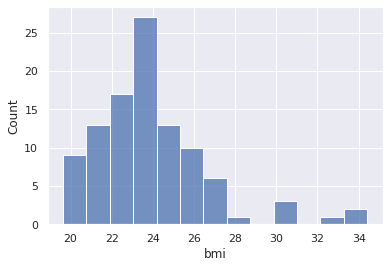

In [ ]:
# Plot the distribution of male and female heights with histograms
sns.histplot(athletes_m["bmi"]) 

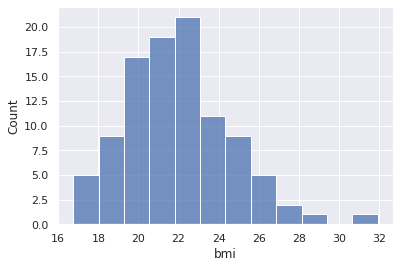

In [ ]:
sns.histplot(athletes_f["bmi"])

The distribution of these variables ***are***/*are not* approximately normal. (If not normal--CLT)

In [ ]:
# run two sample t-test
stats.ttest_ind(athletes_m['bmi'], athletes_f['bmi'])

Ttest_indResult(statistic=5.028903470109566, pvalue=1.093974959722531e-06)

***There is***/*There is not* a statistically sig diff avg bmi of male and female australian athletes.



*WHAT DOES THIS MEAN? WHY DO WE CARE? WHAT DID WE LEARN?*

## Additional Tests

Documentation for z-test with a really simple example at the bottom: https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html

And a really thorough example of an ANOVA (analysis of variance) which compares more than two categories: https://www.reneshbedre.com/blog/anova.html 